<a href="https://colab.research.google.com/github/abidshafee/autoML-tsModel/blob/main/AutoML_ts_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts
!pip install dask_xgboost
#!pip install desk

In order to use Dask's parallelized dataframes (built on top of pandas), you have to tell pip to install some "extras" ([reference ](https://packaging.python.org/installing/#installing-setuptools-extras)), as mentioned in the [Dask installation documentation](http://dask.pydata.org/en/latest/install.html#pip):

`pip install "dask[dataframe]"` Or `pip install "dask[complete]"`

In [2]:
!pip install "dask[complete]" #sol to auto_ts import error

     |████████████████████████████████| 802 kB 31.6 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [3]:
# import auto_ts as ts
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
# df = pd.read_csv("throughput_metrics.csv", parse_dates=['Time'], index_col='Time')
df = pd.read_csv("https://raw.githubusercontent.com/abidshafee/autoML-tsModel/main/throughput_metrics.csv", parse_dates=['Time'], index_col='Time')

In [6]:
df.describe(include='all')

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,1.134300e+10,1.050114e+10,2.422851e+07,7.645930e+07,8.169740e+07,1.194613e+06
std,5.843792e+09,8.509006e+09,3.285736e+07,6.293577e+07,1.297177e+08,8.569518e+05
min,3.227624e+08,0.000000e+00,1.013134e+04,7.408801e+05,0.000000e+00,3.786450e+05
25%,7.677623e+09,3.942119e+09,4.546207e+04,2.792179e+07,1.817469e+07,8.628346e+05
50%,1.002482e+10,8.836137e+09,8.613927e+04,5.725981e+07,5.025162e+07,9.951363e+05
75%,1.335055e+10,1.452307e+10,4.363564e+07,1.097949e+08,9.435435e+07,1.243718e+06
max,7.553718e+10,5.229297e+10,2.513275e+08,3.593521e+08,1.578908e+09,2.659389e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 08:00:00 to 2019-01-01 07:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiteA   8760 non-null   float64
 1   SiteB   8760 non-null   float64
 2   SiteC   8760 non-null   float64
 3   SiteD   8760 non-null   float64
 4   SiteE   8760 non-null   float64
 5   SiteF   8760 non-null   float64
dtypes: float64(6)
memory usage: 479.1 KB


In [8]:
df.isna().any()

SiteA    False
SiteB    False
SiteC    False
SiteD    False
SiteE    False
SiteF    False
dtype: bool

In [9]:
df.dropna() #incase any missing values in future data
df.head()

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
Time,,,,,,
2018-01-01 08:00:00,1.411093e+10,1.109243e+09,8.289831e+07,56650005.21,1.117868e+07,827420.9772
2018-01-01 09:00:00,1.345362e+10,1.242256e+09,4.375739e+04,49307351.26,7.070847e+06,913017.6007
2018-01-01 10:00:00,1.216888e+10,2.006322e+09,4.315725e+04,56843652.59,5.132826e+07,874471.3644
2018-01-01 11:00:00,1.123120e+10,1.073181e+09,8.277154e+07,46645240.59,5.217827e+06,837246.7783
2018-01-01 12:00:00,1.078085e+10,8.645069e+08,3.343548e+04,30966947.37,7.495363e+06,827143.7497


In [10]:
SiteA = df[[df.columns[0]]]
SiteA

,SiteA
Time,
2018-01-01 08:00:00,1.411093e+10
2018-01-01 09:00:00,1.345362e+10
2018-01-01 10:00:00,1.216888e+10
2018-01-01 11:00:00,1.123120e+10
2018-01-01 12:00:00,1.078085e+10
...,...
2019-01-01 03:00:00,4.031000e+09
2019-01-01 04:00:00,8.101920e+09
2019-01-01 05:00:00,7.529417e+09


In [11]:
mpl.rcParams['figure.figsize'] = (13, 7)

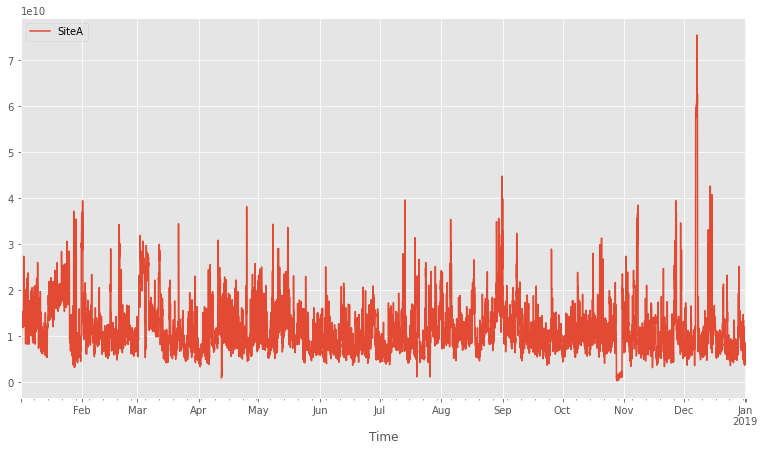

In [12]:
SiteA.plot()

In [13]:
SiteB = df[[df.columns[1]]]
SiteB

,SiteB
Time,
2018-01-01 08:00:00,1.109243e+09
2018-01-01 09:00:00,1.242256e+09
2018-01-01 10:00:00,2.006322e+09
2018-01-01 11:00:00,1.073181e+09
2018-01-01 12:00:00,8.645069e+08
...,...
2019-01-01 03:00:00,8.216592e+09
2019-01-01 04:00:00,8.529913e+09
2019-01-01 05:00:00,8.250299e+09


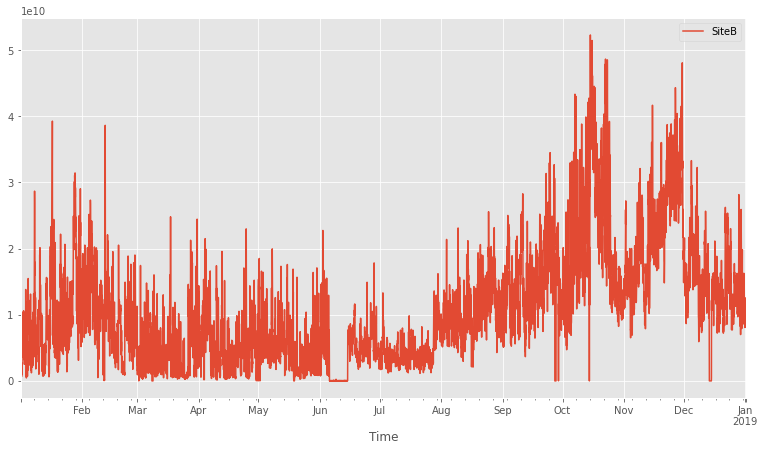

In [14]:
SiteB.plot()

In [15]:
SiteC = df[[df.columns[2]]]
SiteC

,SiteC
Time,
2018-01-01 08:00:00,8.289831e+07
2018-01-01 09:00:00,4.375739e+04
2018-01-01 10:00:00,4.315725e+04
2018-01-01 11:00:00,8.277154e+07
2018-01-01 12:00:00,3.343548e+04
...,...
2019-01-01 03:00:00,4.036552e+07
2019-01-01 04:00:00,4.194376e+07
2019-01-01 05:00:00,4.499228e+04


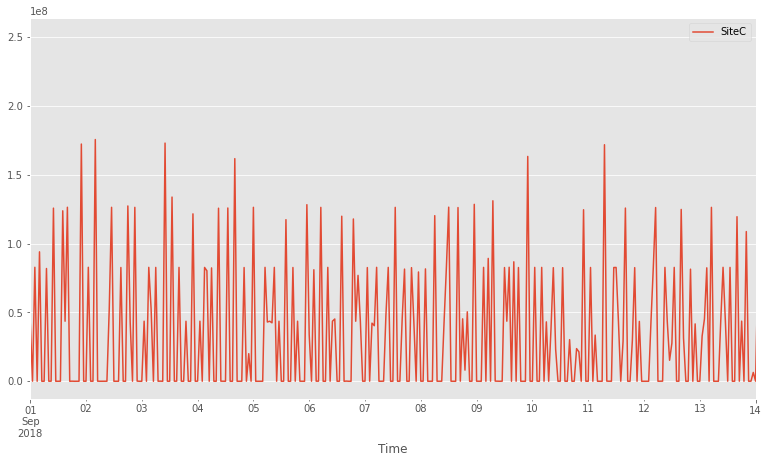

In [16]:
SiteC.plot(xlim=['2018-9-1', '2018-9-14'])

In [17]:
Apr_df = df.loc['2018-4']

In [18]:
SiteA_apr = Apr_df[[Apr_df.columns[0]]]

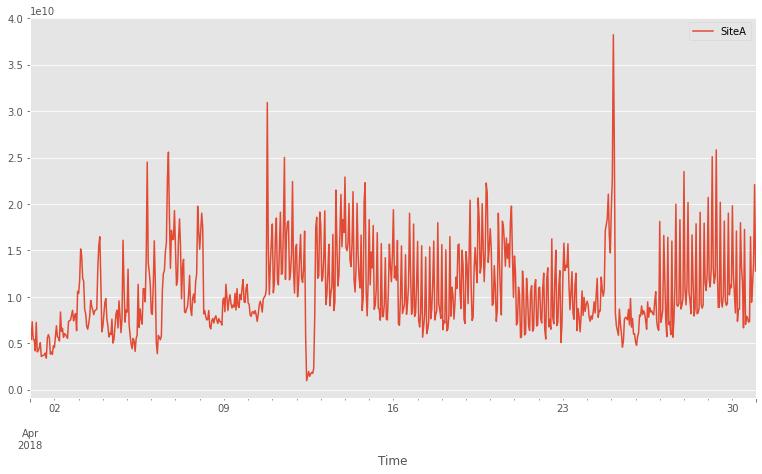

In [19]:
SiteA_apr.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03bce44750>,
      dtype=object)

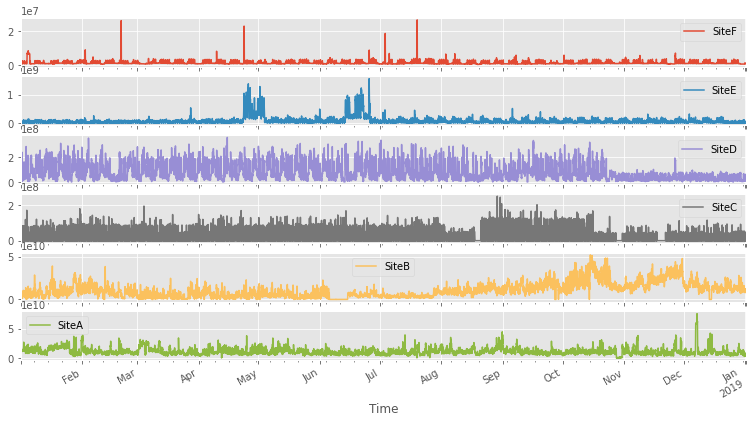

In [51]:
# Plotting all features together
df[['SiteF','SiteE','SiteD','SiteC','SiteB','SiteA']].plot(subplots=True)

In [26]:
df.columns[0]

'SiteA'

In [32]:
df[['SiteA', 'SiteB','SiteC']].values

array([[1.41109302e+10, 1.10924270e+09, 8.28983053e+07],
       [1.34536193e+10, 1.24225568e+09, 4.37573904e+04],
       [1.21688799e+10, 2.00632182e+09, 4.31572535e+04],
       ...,
       [7.52941681e+09, 8.25029932e+09, 4.49922778e+04],
       [6.88469466e+09, 9.62731719e+09, 7.31901028e+04],
       [8.67557506e+09, 1.22801190e+10, 7.31901028e+04]])

In [33]:
import numpy as np

In [50]:
np.ndarray(tdf[0])

TypeError: ignored

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
tdf = scaler.fit_transform(df)

In [47]:
tdf[0]

array([ 0.47368079, -1.10382285,  1.78569239, -0.31477219, -0.5436633 ,
       -0.42851037])

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
MMX = MinMaxScaler()

In [44]:
mxdf = MMX.fit_transform(df)